# MCSD2123-01 MASSIVE DATA MINING AND STREAMING


## Assignment 1
#### Machine learning has been widely used in email spam filtering. Given two sets of labeled datasets of text messages (spam or not-spam).
#### Using the given datasets, required to train models that can classify text messages using TWO (2) supervised learning algorithms. Then, evaluate and compare the performance of both models, and interpret the results.
#### Design and implement experiments in Python or any other tools.

## Group 2:
## 1. Tan Boon Chu (MCS211006)
## 2. Chong Chin Teng (MCS211014)
## 3. Pua Zheng Ying (MCS211031)

# 
# 1.0 Dataset Overview
* Pre-processing and preparation of the data

## 1.1 Connect to Google Drive

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Import PyDrive and libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Downloading data file.
file_id = '1PVWX3ZpznS5RdYBHL7k3dE-se3LyDnIr'
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('Data2.csv')  

In [ ]:
# Read Data file
df = pd.read_csv('Data2.csv')

# View first 10 rows
print(df.head(10))

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...



## 1.2 Load, Analyze and Visualize Dataset

In [ ]:
# Import necessary packages
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# View 10 sample messages
df.sample(10)

,Category,Message
2484,ham,Mm have some kanji dont eat anything heavy ok
1626,ham,Hi Dear Call me its urgnt. I don't know whats ...
1833,ham,What time is ur flight tmr?
4358,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L..."
3379,ham,Hows that watch resizing
1590,ham,I love you. You set my soul on fire. It is not...
5440,ham,Thank you. do you generally date the brothas?
541,spam,from www.Applausestore.com MonthlySubscription...
2816,ham,Some are lasting as much as 2 hours. You might...
3343,ham,You will go to walmart. I.ll stay.


In [ ]:
df['Category'] = df.Category.map({'ham':0, 'spam':1})
print(df.head())

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# Check total number of message of dataset
print("Number of Message: {}".format(len(df)))

Number of Message: 5572


In [ ]:
# To view the details for two category: ham and spam messages
df.groupby('Category').describe().T

Category                             0  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                        1  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

In [ ]:
# Show the total number of each category
print("Number of ham: {}".format(df[df["Category"]==0].count()[0]))
print("Number of spam: {}".format(df[df["Category"]==1].count()[0]))

Number of ham: 4825
Number of spam: 747


In [ ]:
# View a message and its sentiment based on a message ID
msg_id = 134
msg = df.iloc[msg_id]

In [ ]:
print("Message: {}".format(msg["Message"]))
print("Message sentiment: {}".format(msg["Category"]))

Message: Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone
Message sentiment: 1


### Pie Chart by using Matplotlib

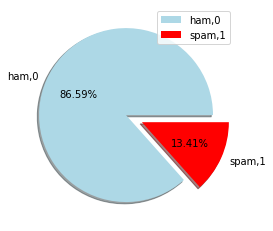

In [ ]:
#From describe len(spam)=4825,len(ham)=747 to plot pie chart to visualize each category percentage
size = [4825, 747]  
labels = ['ham,0', 'spam,1']
colors = ['lightblue', 'red']

plt.pie(size, colors = colors, labels = labels, shadow = True, explode=(0,0.2),autopct = '%0.2f%%')
plt.legend()
plt.show()

### Wordclouds

In [ ]:
# Import Wordclouds' package for quick overview of most recurrent words in the text corpus
from wordcloud import WordCloud

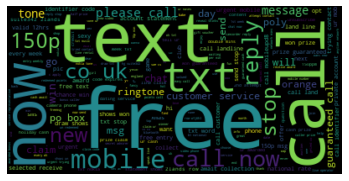

In [ ]:
# Display the most recurrent words in Spam Category
pos_messages = df[df["Category"]==1]
txt = " ".join(msg.lower() for msg in pos_messages["Message"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

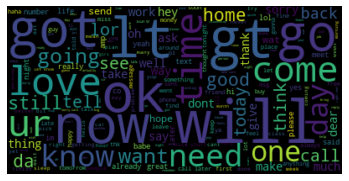

In [ ]:
# Display the most recurrent words in Ham Category
pos_messages = df[df["Category"]==0]
txt = " ".join(msg.lower() for msg in pos_messages["Message"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 
# 2.0 Text Normalization: Text Cleaning and Feature Extraction

* **Implementing Bag of Words** by remove upper capitalization, remove all punctuations, then tokenize into piece of text and count the frequency of the words in that text.

In [ ]:
# Let docs as example list of text
docs = ['heLLO, how are YOU~',
        'reply to win, WIN money!!!',
        'Click this link...',
        'Hello, cALL u u TMR??']

In [ ]:
# Step 1: Remove upper capitalization
lower_docs = []
for i in docs:
    lower_docs.append(i.lower())
print(lower_docs)

['hello, how are you~', 'reply to win, win money!!!', 'click this link...', 'hello, call u u tmr??']


In [ ]:
# Step 2: Remove all punctuations
# import string library to show all punctuations
import string
result = string.punctuation
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# define function to remove punctuations
def remove_punc(string):
    for i in string:  
        if i in result:  
            string = string.replace(i, "") 
    return string
 
lower_docs = [remove_punc(i) for i in lower_docs]
print(lower_docs) # cleaned list

['hello how are you', 'reply to win win money', 'click this link', 'hello call u u tmr']


In [ ]:
# Step 3: Tokenize into piece of text
preprocessed_docs = []
for i in lower_docs:
    preprocessed_docs.append(i.split(' '))
print(preprocessed_docs)

[['hello', 'how', 'are', 'you'], ['reply', 'to', 'win', 'win', 'money'], ['click', 'this', 'link'], ['hello', 'call', 'u', 'u', 'tmr']]


In [ ]:
# Step 4: count the frequency of the words in that text.
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_docs:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'reply': 1, 'to': 1, 'money': 1}),
 Counter({'click': 1, 'this': 1, 'link': 1}),
 Counter({'u': 2, 'hello': 1, 'call': 1, 'tmr': 1})]


### Import CountVectorizer from the Scikit-learn Library

In [ ]:
# to instantly vectorize as above using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [ ]:
docs = ['heLLO, how are YOU~',
        'reply to win, WIN money!!!',
        'Click this link...',
        'Hello, cALL u u TMR??']

In [ ]:
count_vector.fit(docs)
count_vector.get_feature_names_out()

array(['are', 'call', 'click', 'hello', 'how', 'link', 'money', 'reply',
       'this', 'tmr', 'to', 'win', 'you'], dtype=object)

In [ ]:
doc_array = count_vector.transform(docs).toarray()
doc_array

array([[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [ ]:
frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names_out())
frequency_matrix

,are,call,click,hello,how,link,money,reply,this,tmr,to,win,you
0,1,0,0,1,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,1,0,0,1,2,0
2,0,0,1,0,0,1,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0


# 
# 3.0 Split Dataset into Training and Testing for Model 

* Split the data using the following variables:
1. X_train is our training data for the 'Message' column.
2. y_train is our training data for the 'Category' column
3. X_test is our testing data for the 'Message' column.
4. y_test is our testing data for the 'Category' column

In [ ]:
# Import train_test_split from sklearn.model_selection, and then split randomly with 70-30 concept
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'],  df['Category'], random_state=1,test_size = 0.3)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the testing set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 3900
Number of rows in the testing set: 1672


In [ ]:
# Import CountVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Transformed training data (X_train) into CountVectorizer() and return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform our testing data (X_test) to return the matrix
testing_data = count_vector.transform(X_test)

# 
# 4.0 Implementing Supervised Learning Algorithms

### 4.1 Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
nb_pred = naive_bayes.predict(testing_data)

nb_acc = accuracy_score(y_test,nb_pred)*100
nb_prec= precision_score(y_test,nb_pred)*100
nb_rec= recall_score(y_test,nb_pred)*100
nb_f1= f1_score(y_test,nb_pred)*100

### 4.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(training_data,y_train)
rf_pred = rf.predict(testing_data)

rf_acc = accuracy_score(y_test,rf_pred)*100
rf_prec= precision_score(y_test,rf_pred)*100
rf_rec= recall_score(y_test,rf_pred)*100
rf_f1= f1_score(y_test,rf_pred)*100

### 4.3 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(training_data,y_train)
sv_pred=sv.predict(testing_data)

sv_acc = accuracy_score(y_test,sv_pred)*100
sv_prec= precision_score(y_test,sv_pred)*100
sv_rec= recall_score(y_test,sv_pred)*100
sv_f1= f1_score(y_test,sv_pred)*100

### 4.4 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(training_data, y_train)
log_pred = log.predict(testing_data)

log_acc = accuracy_score(y_test,log_pred)*100
log_prec= precision_score(y_test,log_pred)*100
log_rec= recall_score(y_test,log_pred)*100
log_f1= f1_score(y_test,log_pred)*100

# 
# 5.0 Scoring and Metrics

### 5.1 Navie Bayes Metric Score

In [ ]:
print('Accuracy score: ', format(accuracy_score(y_test, nb_pred)))
print('Precision score: ', format(precision_score(y_test, nb_pred)))
print('Recall score: ', format(recall_score(y_test, nb_pred)))
print('F1 score: ', format(f1_score(y_test, nb_pred)))

Accuracy score:  0.9868421052631579
Precision score:  0.9727272727272728
Recall score:  0.9304347826086956
F1 score:  0.9511111111111111


### 5.2 Random Forest Metric Score

In [ ]:
print('Accuracy score: ', format(accuracy_score(y_test, rf_pred)))
print('Precision score: ', format(precision_score(y_test, rf_pred)))
print('Recall score: ', format(recall_score(y_test, rf_pred)))
print('F1 score: ', format(f1_score(y_test, rf_pred)))

Accuracy score:  0.9778708133971292
Precision score:  1.0
Recall score:  0.8391304347826087
F1 score:  0.9125295508274232


### 5.3 Support Vector Machine (SVM) Metric Score

In [ ]:
print('Accuracy score: ', format(accuracy_score(y_test, sv_pred)))
print('Precision score: ', format(precision_score(y_test, sv_pred)))
print('Recall score: ', format(recall_score(y_test, sv_pred)))
print('F1 score: ', format(f1_score(y_test, sv_pred)))

Accuracy score:  0.9772727272727273
Precision score:  0.9897959183673469
Recall score:  0.8434782608695652
F1 score:  0.9107981220657276


### 5.4 Logistic Regression Metric Score

In [ ]:
print('Accuracy score: ', format(accuracy_score(y_test, log_pred)))
print('Precision score: ', format(precision_score(y_test, log_pred)))
print('Recall score: ', format(recall_score(y_test, log_pred)))
print('F1 score: ', format(f1_score(y_test, log_pred)))

Accuracy score:  0.9814593301435407
Precision score:  0.9853658536585366
Recall score:  0.8782608695652174
F1 score:  0.9287356321839081


## Comparision of Metric Scores

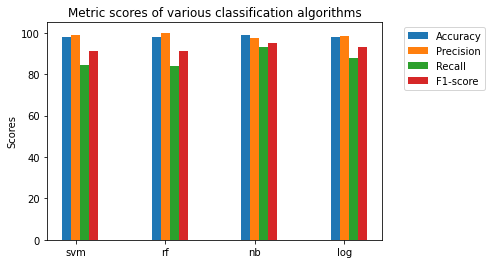

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['sv','rf','nb','log']
accuracy=[sv_acc,rf_acc,nb_acc,log_acc]
precision=[sv_prec,rf_prec,nb_prec,log_prec]
recall=[sv_rec,rf_rec,nb_rec,log_rec]
f1_score=[sv_f1,rf_f1,nb_f1,log_f1]

width = 0.2  
r1 = np.arange(0,len(labels)*2,2) 
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

rects1 = plt.bar(r1, accuracy, width, label='Accuracy')
rects2 = plt.bar(r2, precision, width, label='Precision')
rects3 = plt.bar(r3, recall, width, label='Recall')
rects4 = plt.bar(r4, f1_score, width, label='F1-score')
plt.rcParams["figure.figsize"] = (15,5)

plt.ylabel('Scores')
plt.title('Metric scores of various classification algorithms')
plt.xticks([r + width for r in range(0,len(labels)*2,2)], ['svm','rf','nb','log'])
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.show()

## Confusion Matrix

* From 4 models result, **Naive Bayes Model** got the highest Metric Score

In [ ]:
# Plot the confusion Matrix of Naive Bayes Model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(nb_pred , y_test)) 

[[1436   16]
 [   6  214]]


In [ ]:
# Classification Report of Naive Bayes Model
from sklearn.metrics import classification_report
target_names = ['Ham,0', 'Spam,1']
print(classification_report(y_test, nb_pred, target_names=target_names))

              precision    recall  f1-score   support

       Ham,0       0.99      1.00      0.99      1442
      Spam,1       0.97      0.93      0.95       230

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



# 
# 6.0 Conclusion

* Select naive bayes model as an overall highest accuracy model for spam email detection 

## 6.1 Mini-Pipeline

* Create a mini-pipiline to detect other message

* Import the Data

In [ ]:
file_id = '1HYeWdPwitOx9FEmNAMumDdMAHt21nwrF'
downloaded2 = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded2.GetContentFile('Data1_test.csv')  

In [ ]:
df1 = pd.read_csv('Data1_test.csv', encoding='unicode_escape')

# Output printing out first 5 columns
print(df1.head())

   S. No.                                       Message_body Label
0       1  UpgrdCentre Orange customer, you may now claim...  Spam
1       2  Loan for any purpose £500 - £75,000. Homeowner...  Spam
2       3  Congrats! Nokia 3650 video camera phone is you...  Spam
3       4  URGENT! Your Mobile number has been awarded wi...  Spam
4       5  Someone has contacted our dating service and e...  Spam


In [ ]:
# Delete the serial number column
df1 = df1.iloc[:,1:]

print(df1.head())

                                        Message_body Label
0  UpgrdCentre Orange customer, you may now claim...  Spam
1  Loan for any purpose £500 - £75,000. Homeowner...  Spam
2  Congrats! Nokia 3650 video camera phone is you...  Spam
3  URGENT! Your Mobile number has been awarded wi...  Spam
4  Someone has contacted our dating service and e...  Spam


* Convert Label: Non-Spam = 0, Spam = 1

In [ ]:
df1['Label'] = df1.Label.map({'Non-Spam':0, 'Spam':1})
print(df1.head())

                                        Message_body  Label
0  UpgrdCentre Orange customer, you may now claim...      1
1  Loan for any purpose £500 - £75,000. Homeowner...      1
2  Congrats! Nokia 3650 video camera phone is you...      1
3  URGENT! Your Mobile number has been awarded wi...      1
4  Someone has contacted our dating service and e...      1


In [ ]:
print("Number of Message: {}".format(len(df1)))

Number of Message: 125


In [ ]:
print('Number of rows in the total set: {}'.format(df1.shape[0]))
print('Number of rows in the testing set: {}'.format(df1.shape[0]))

Number of rows in the total set: 125
Number of rows in the testing set: 125


* Random pick a message from df1 by using random package

In [ ]:
import random
msg_id = random.randint(0, len(df1))
new_msg_iloc = df1.iloc[msg_id]
new_msg = format(new_msg_iloc["Message_body"])

* Print the Message_body selected and the Label

In [ ]:
print("Message: {}".format(new_msg_iloc["Message_body"]))
print("Message label: {}".format(new_msg_iloc["Label"]))

Message: GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
Message label: 1


* Define a function to detect the message

In [ ]:
def predict_msg(msg):
  t_processed_msg = count_vector.transform([msg])
  nb_pred = naive_bayes.predict(t_processed_msg)

  if nb_pred == 1:
    return "Prediction is spam, 1."
  else:
    return "Prediction is ham, 0."

In [ ]:
predict_msg(new_msg)

'Prediction is spam, 1.'

* You also can typing any testing message and predict your message:

In [ ]:
testing_msg= "Sat right? Okaaaay thankssssss..."

In [ ]:
predict_msg(testing_msg)

'Prediction is ham, 0.'